# Deutsch Algorithm

In [15]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

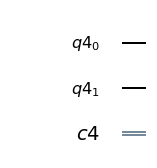

In [29]:
qubit_num = 2     # number of qubits, i.e, the size of the quantum register 
bit_num = 1       # size of classical register, this is where we will store the measured output

q = QuantumRegister(qubit_num)  # initializing quantum register
c = ClassicalRegister(bit_num)  # initializing classical register

qc = QuantumCircuit(q, c)       # using the registers made above let's build the quantum circuit

#draw circuit
qc.draw(output='mpl')

## Algorithm implementation


Now, this is the circuit we have to build

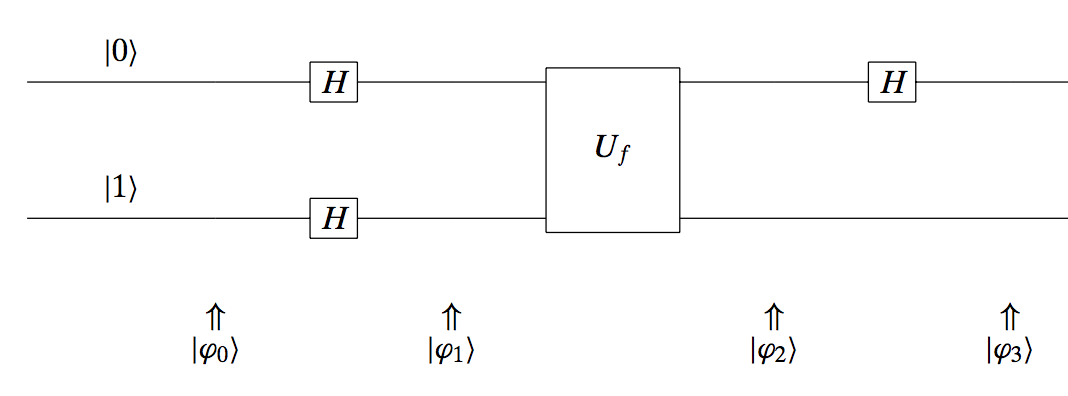

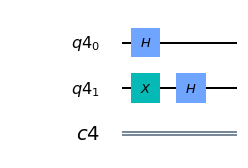

In [30]:
# let's apply a hadamard gate on the first qubit. numbering of qubits starts from 0
qc.h(0)  

# to a get a minus state on te second qubit let's apply an X gate and then a H gate.
qc.x(1)
qc.h(1)

#draw circuit
qc.draw(output='mpl')

## Building the oracle

let's try to create an oracle which is analogus to an identity function, i.e, f(0)=0 and f(1)=1. This can we achieved by applying a CNOT gate.  

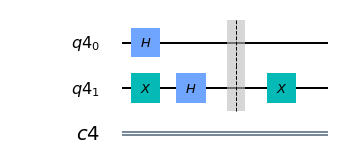

In [31]:
qc.barrier()  # just a barrier to make it look neat

######### replace this section with the oracle you want.
qc.cnot(0, 1)  # applying a CNOT

# qc.x(1)       # comment the cnot above and uncomment this to test for a constant function f(x)=1
#########


#draw()
qc.draw(output='mpl')

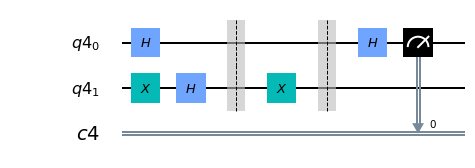

In [32]:
# finally applying the last hadamard

qc.barrier()
qc.h(0)


# we won't get any results until we measure our qubits and store the answers in the classical register that we created

qc.measure(q[0], c[0])    # measurement of qubit one is stored in the classical register.
                          # according to the algorithm, if we get zero, we know it's a constant function and vice versa
qc.draw(output = 'mpl')   # complete circuit

## Running it on a simulator on your computer or on the cloud

We can choose what backend to use. 'qasm_simulator' is a simulator (not a real quantum device) which runs on your local machine => faster results for smaller problems. And 'ibmq_qasm_simulator' works on the cloud (you'll need to have an IBM Quantum experience account and have to save your authentication key to get access, steps are given below)

In [33]:
# running and getting results 

# authenticating the IBM Q account for using method 2
# provider = IBMQ.save_account('insert authentication key from your IBM Quantum experience dashboard here')


# Method 1: simulator on your local machine
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=100)         # shots is the number of times you want to conduct this experiment and record results. Higher the number, better the probability distribution, but comes at the cost of increased computational time. 

# Method 2: simulator on the cloud
# backend = provider.get_backend('ibmq_qasm_simulator')
# job = execute(qc, backend=backend, shots=8000, seed_simulator=12345, backend_options={"fusion_enable":True})

result = job.result()
count = result.get_counts()
print(count)

{'0': 100}
